In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액

In [3]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [4]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


* id : 아이디 (의미가 없는 컬럼으로 추후 드랍예정이다.)
* recency : 최근이용을 언제 했었나 (10일전, 6일전 ..)
* zip_code : 우편번호 (한번 가공이 된 상태)
* is_referral : 추천인이 있고 없음 으로 가입을 했는지
* channe : 서비스 이용 채널 (폰, 웹 )
* conversion : 프로모션을 받고 나서 고객이 구입을 했는지 안했는지 (우리가 예측하고자 하는 컬럼/종속변수)

* 데이터 컬럼 살펴보기
* id : 아이디 (의미가 없는 컬럼으로 추후 드랍예정이다.)
* num_item : 한 거래에 몇개에 아이템을 구매 했는지
* total_amount : 총 금액

In [5]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [6]:
mem.isna().sum()

id             0
recency        0
zip_code       0
is_referral    0
channel        0
conversion     0
dtype: int64

In [7]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [8]:
tran.isna().sum()

id              0
num_item        0
total_amount    0
dtype: int64

In [9]:
mem['id'].describe()

count     64000.000000
mean     550694.137797
std      259105.689773
min      100001.000000
25%      326772.000000
50%      551300.000000
75%      774914.500000
max      999997.000000
Name: id, dtype: float64

m_mini = 326772.000000 - (1.5 * (774914.500000 - 326772.000000))
m_max = 774914.500000 + (1.5 * (774914.500000 - 326772.000000))

print("minimun :", m_mini)
print("maximun :", m_max)

In [19]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [20]:
tran['avg_price'] = tran['total_amount'] / tran['num_item']

In [21]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            196836 non-null  int64  
 1   num_item      196836 non-null  int64  
 2   total_amount  196836 non-null  int64  
 3   avg_price     196836 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 6.0 MB


In [23]:
tran['avg_price'].head()

0     6800.0
1    27000.0
2     8250.0
3     7250.0
4     8250.0
Name: avg_price, dtype: float64

In [28]:
tran.groupby('id').mean()

,num_item,total_amount,avg_price
id,,,
100001,3.500000,26000.000000,7500.000000
100008,5.000000,26000.000000,5200.000000
100032,2.666667,20666.666667,9366.666667
100036,3.000000,25800.000000,13273.333333
100070,3.250000,21250.000000,8537.500000
...,...,...,...
999932,5.000000,32000.000000,6400.000000
999981,2.000000,22750.000000,12875.000000
999990,3.000000,28000.000000,10388.888889


In [29]:
tran.groupby('id').value_counts()

id      num_item  total_amount  avg_price   
100001  3         24000         8000.000000     1
        4         28000         7000.000000     1
100008  5         26000         5200.000000     1
100032  1         11000         11000.000000    1
        2         23000         11500.000000    1
                                               ..
999990  2         30000         15000.000000    1
        3         32000         10666.666667    1
        4         22000         5500.000000     1
999995  2         27000         13500.000000    1
999997  2         13000         6500.000000     1
Name: count, Length: 194954, dtype: int64

In [30]:
tran['id'].value_counts()

id
691067    5
720147    5
422265    5
670720    5
154620    5
         ..
881780    1
154471    1
480462    1
126129    1
156423    1
Name: count, Length: 64000, dtype: int64

<Axes: >

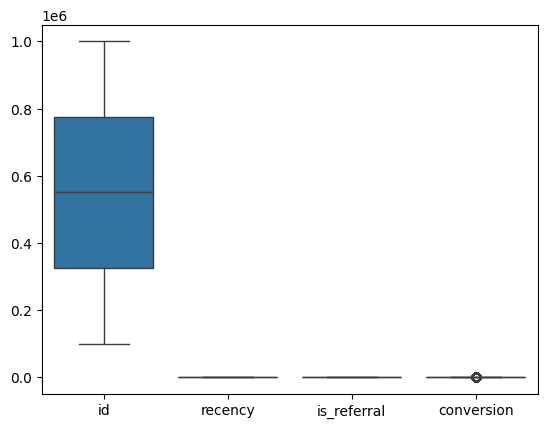

In [77]:
sns.boxplot(mem)

<Axes: >

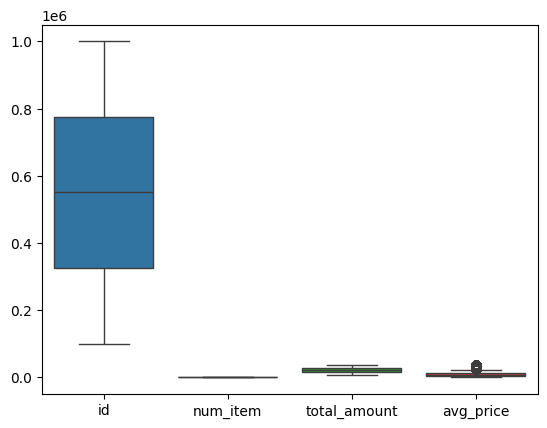

In [78]:
sns.boxplot(tran)

In [24]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [25]:
mem['recency'].unique()

array([10,  6,  7,  9,  2,  1,  5,  4,  3, 11, 12,  8], dtype=int64)

In [26]:
mem['recency'].nunique()

12

mem['recency'] 값이 작을수록 Frquency 구매빈도는 높다?라고 말할 수 있나?
값이 작고 총 금액이나 평균이 크면 됨

In [31]:
data = pd.merge(mem, tran, on='id', how = 'outer')

In [32]:
data.head()

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price
0,100001,6,Urban,1,Phone,0,3,24000,8000.0
1,100001,6,Urban,1,Phone,0,4,28000,7000.0
2,100008,3,Urban,1,Web,0,5,26000,5200.0
3,100032,11,Urban,1,Phone,0,5,28000,5600.0
4,100032,11,Urban,1,Phone,0,1,11000,11000.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            196836 non-null  int64  
 1   recency       196836 non-null  int64  
 2   zip_code      196836 non-null  object 
 3   is_referral   196836 non-null  int64  
 4   channel       196836 non-null  object 
 5   conversion    196836 non-null  int64  
 6   num_item      196836 non-null  int64  
 7   total_amount  196836 non-null  int64  
 8   avg_price     196836 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 13.5+ MB


In [35]:
data.isna().sum()

id              0
recency         0
zip_code        0
is_referral     0
channel         0
conversion      0
num_item        0
total_amount    0
avg_price       0
dtype: int64

In [36]:
data['is_referral'].unique()

array([1, 0], dtype=int64)

In [37]:
data['zip_code'].unique()

array(['Urban', 'Surburban', 'Rural'], dtype=object)

In [38]:
data['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            196836 non-null  int64  
 1   recency       196836 non-null  int64  
 2   zip_code      196836 non-null  object 
 3   is_referral   196836 non-null  int64  
 4   channel       196836 non-null  object 
 5   conversion    196836 non-null  int64  
 6   num_item      196836 non-null  int64  
 7   total_amount  196836 non-null  int64  
 8   avg_price     196836 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 13.5+ MB


In [41]:
pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first=True)

,id,recency,is_referral,conversion,num_item,total_amount,avg_price,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,100001,6,1,0,3,24000,8000.000000,False,True,True,False
1,100001,6,1,0,4,28000,7000.000000,False,True,True,False
2,100008,3,1,0,5,26000,5200.000000,False,True,False,True
3,100032,11,1,0,5,28000,5600.000000,False,True,True,False
4,100032,11,1,0,1,11000,11000.000000,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
196831,999990,8,1,0,3,32000,10666.666667,False,False,True,False
196832,999990,8,1,0,2,30000,15000.000000,False,False,True,False
196833,999990,8,1,0,4,22000,5500.000000,False,False,True,False
196834,999995,3,1,0,2,27000,13500.000000,True,False,True,False


In [42]:
data = pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  196836 non-null  int64  
 1   recency             196836 non-null  int64  
 2   is_referral         196836 non-null  int64  
 3   conversion          196836 non-null  int64  
 4   num_item            196836 non-null  int64  
 5   total_amount        196836 non-null  int64  
 6   avg_price           196836 non-null  float64
 7   zip_code_Surburban  196836 non-null  bool   
 8   zip_code_Urban      196836 non-null  bool   
 9   channel_Phone       196836 non-null  bool   
 10  channel_Web         196836 non-null  bool   
dtypes: bool(4), float64(1), int64(6)
memory usage: 11.3 MB


mem['recency'] 값이 작을수록 Frquency 구매빈도는 높다?라고 말할 수 있나?
값이 작고 총 금액이나 평균이 크면 됨

In [46]:
data.groupby('recency')['avg_price'].value_counts(sort = True)

recency  avg_price   
1        6000.000000     797
         5000.000000     756
         7000.000000     743
         4000.000000     729
         8000.000000     710
                        ... 
12       1500.000000       4
         7400.000000       4
         38000.000000      4
         3166.666667       2
         4833.333333       1
Name: count, Length: 1536, dtype: int64

In [49]:
data.groupby('recency')['avg_price'].value_counts(sort=True).unstack(fill_value=0)

avg_price,1500.000000,1600.000000,1666.666667,1800.000000,1833.333333,2000.000000,2166.666667,2200.000000,2250.000000,2333.333333,...,29000.000000,30000.000000,31000.000000,32000.000000,33000.000000,34000.000000,35000.000000,36000.000000,37000.000000,38000.000000
recency,,,,,,,,,,,,,,,,,,,,,
1,44,166,36,183,29,373,37,185,184,35,...,210,187,165,186,212,157,202,38,26,37
2,23,133,33,149,34,339,32,162,136,32,...,186,141,168,167,163,173,165,30,22,18
3,17,120,17,119,23,245,20,118,129,12,...,109,125,137,149,125,112,124,9,18,23
4,19,94,12,93,19,216,18,122,98,14,...,111,109,111,95,77,111,104,15,17,12
5,13,87,18,84,18,215,16,88,101,15,...,90,109,108,105,69,99,107,7,14,15
6,9,87,11,96,8,179,11,81,80,15,...,109,96,103,109,90,80,92,14,9,11
7,9,68,11,104,9,160,9,91,105,9,...,89,70,91,90,93,76,77,12,11,7
8,8,54,7,74,7,149,10,66,63,12,...,76,77,93,68,66,76,79,10,10,13
9,18,126,15,112,14,277,13,127,136,16,...,123,123,167,123,125,135,143,15,18,18


In [50]:
data.groupby('recency')['total_amount'].value_counts(sort=True).unstack(fill_value=0)

total_amount,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,...,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000
recency,,,,,,,,,,,,,,,,,,,,,
1,809,998,1009,965,919,957,1041,1011,980,954,...,987,967,987,940,1018,896,967,174,211,209
2,672,798,826,814,815,863,820,817,876,829,...,829,801,862,852,860,878,819,162,153,132
3,498,661,633,630,636,649,607,612,594,615,...,650,616,627,698,676,658,648,111,116,113
4,480,522,537,566,556,523,558,568,555,558,...,561,527,568,538,548,553,571,78,75,73
5,461,504,486,492,500,535,478,519,483,504,...,488,497,479,495,483,461,504,71,66,77
6,439,467,481,486,519,535,499,525,507,476,...,507,487,513,538,470,483,494,78,76,83
7,337,482,451,461,430,481,456,426,434,426,...,429,428,440,456,455,409,431,66,77,63
8,295,354,376,376,380,382,398,415,384,400,...,363,377,406,376,392,386,365,55,45,48
9,621,689,684,703,720,697,679,699,722,731,...,738,710,708,678,683,690,683,84,96,91


* recency랑 total
* recency이 작으면 total_amount가 높다
* purchase_intensity : recency가 작을수록 구매 강도가 높다는 가정을 나타내는 용어

In [51]:
data['purchase_intensity'] = data['total_amount'] / data['recency']

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  196836 non-null  int64  
 1   recency             196836 non-null  int64  
 2   is_referral         196836 non-null  int64  
 3   conversion          196836 non-null  int64  
 4   num_item            196836 non-null  int64  
 5   total_amount        196836 non-null  int64  
 6   avg_price           196836 non-null  float64
 7   zip_code_Surburban  196836 non-null  bool   
 8   zip_code_Urban      196836 non-null  bool   
 9   channel_Phone       196836 non-null  bool   
 10  channel_Web         196836 non-null  bool   
 11  purchase_intensity  196836 non-null  float64
dtypes: bool(4), float64(2), int64(6)
memory usage: 12.8 MB


In [ ]:
data.groupby('purchase_intensity')['conversion']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = data.drop('conversion', axis = 1)
y = data['conversion']

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=7)

In [66]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state= 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8742601671450707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367



In [67]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth = i, random_state= 7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.8602890746056342
1               precision    recall  f1-score   support

           0       0.86      1.00      0.92     32820
           1       1.00      0.16      0.28      6547

    accuracy                           0.86     39367
   macro avg       0.93      0.58      0.60     39367
weighted avg       0.88      0.86      0.82     39367

2 0.8742601671450707
2               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

3 0.8742601671450707
3               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weigh

In [68]:
dtc = DecisionTreeClassifier(max_depth = 6, random_state= 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8742601671450707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367



In [69]:
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8761938630359682
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.26      0.41      6548

    accuracy                           0.88     39368
   macro avg       0.94      0.63      0.67     39368
weighted avg       0.89      0.88      0.84     39368



# 배깅

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
bcf = BaggingClassifier(n_estimators=10, n_jobs= -1, random_state=777)
bcf.fit(X_train, y_train)
pred = bcf.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8663093453908096
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     32820
           1       0.74      0.30      0.43      6547

    accuracy                           0.87     39367
   macro avg       0.81      0.64      0.68     39367
weighted avg       0.85      0.87      0.84     39367



In [72]:
est = DecisionTreeClassifier(max_depth = 6, random_state= 7)

In [73]:
bcf = BaggingClassifier(estimator=est, n_estimators=10, n_jobs=-1, random_state=777)
bcf.fit(X_train, y_train)
pred = bcf.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8742601671450707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367



# 부스팅 모델

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate = 0.1, n_jobs= -1, random_state = 777 )
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

0.8742347651586354
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367



In [76]:
for i in range(1,30):
    xgb = XGBClassifier(n_estimators=1000, max_depth=i, learning_rate = 0.1, n_jobs= -1, random_state = 777 )
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_valid)
    print(accuracy_score(y_valid, pred))
    print(classification_report(y_valid, pred))

0.8742601671450707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

0.8742601671450707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

0.8742347651586354
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg     

In [79]:
from lightgbm import LGBMClassifier

In [80]:
lgbm = LGBMClassifier(n_estimators=1000, max_depth=3, learning_rate = 0.1, n_jobs= -1, random_state = 777 )
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))

[LightGBM] [Info] Number of positive: 19643, number of negative: 98458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 118101, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166324 -> initscore=-1.611909
[LightGBM] [Info] Start training from score -1.611909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [81]:
for i in range(1,30):
    lgbm = LGBMClassifier(n_estimators=1000, max_depth=i, learning_rate = 0.1, n_jobs= -1, random_state = 777, verbose=-1 )
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))

1 0.8742601671450707
1               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

2 0.8742601671450707
2               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

3 0.8742601671450707
3               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weigh

# 하이퍼파라미터 튜닝

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [83]:
xgb_params = dict(n_estimators=[100,500,1000,1500], max_depth=[1,3,5,7], learning_rate = [0.1,0.5,1.0], n_jobs= [-1], random_state = [777], sampling_method = [ 'uniform'])

In [84]:
xgb = XGBClassifier()

In [85]:
grid_cv = GridSearchCV(xgb, param_grid = xgb_params, cv =5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", grid_cv.best_params_)
print(f"최고 예측 정확도 : {grid_cv.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'param_sampling_method', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 777, 'sampling_method': 'uniform'}
최고 예측 정확도 : 0.8750


In [86]:
xgb3 = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate = 0.1, n_jobs= -1, random_state = 777 )
xgb3.fit(X_train, y_train)
pred3 = xgb3.predict(X_valid)
print(accuracy_score(y_valid, pred3))
print(classification_report(y_valid, pred3))
print("="*20, 'test 결과', "="*20)
pred3_test = xgb3.predict(X_test)
print(accuracy_score(y_test, pred3_test))
print(classification_report(y_test, pred3_test))

0.8742347651586354
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

==================== test 결과 ====================
0.8761938630359682
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.26      0.41      6548

    accuracy                           0.88     39368
   macro avg       0.94      0.63      0.67     39368
weighted avg       0.89      0.88      0.84     39368



# RandomizedSearchCV

In [87]:
rand_cv = RandomizedSearchCV(xgb, param_distributions = xgb_params, n_iter=100, cv =5, n_jobs=-1, verbose=3, random_state=77)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", rand_cv.best_params_)
print(f"최고 예측 정확도 : {rand_cv.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'param_sampling_method', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 : {'sampling_method': 'uniform', 'random_state': 777, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.1}
최고 예측 정확도 : 0.8750


# lightgbm에 gridcv, randomizedcv 사용해 최적 파라미터 탐색하기

In [88]:
lgbm_params2 = dict(n_estimators=[100,500,1000,1500], max_depth=[1,3,5,7], learning_rate = [0.1,0.5,1.0], n_jobs= [-1], random_state = [777], sampling_method = [ 'uniform'])

In [89]:
lgbm2 = LGBMClassifier()

In [90]:
grid_cv = GridSearchCV(xgb, param_grid = xgb_params, cv =5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", grid_cv.best_params_)
print(f"최고 예측 정확도 : {grid_cv.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'param_sampling_method', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 777, 'sampling_method': 'uniform'}
최고 예측 정확도 : 0.8750


In [91]:
rand_cv = RandomizedSearchCV(estimator=lgbm2, param_distributions=lgbm_params2, n_iter=100, cv=5, n_jobs=-1, verbose=3, random_state=77)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", rand_cv.best_params_)
print(f"최고 예측 정확도 : {rand_cv.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'param_sampling_method', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 : {'sampling_method': 'uniform', 'random_state': 777, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.1}
최고 예측 정확도 : 0.8750


# RandomForest에 gridcv, randomizedcv 사용해 최적 파라미터 탐색하기

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc_params = dict(n_estimators=[100,500,1000,1500], max_depth=[1,3,5,7, 9], n_jobs= [-1], random_state = [7, 77, 777], criterion = ['gini', 'entropy'])

In [94]:
rfc = RandomForestClassifier()

In [95]:
grid_cv = GridSearchCV(xgb, param_grid = xgb_params, cv =5, n_jobs=-1, verbose=3)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_valid)
print(sorted(grid_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", grid_cv.best_params_)
print(f"최고 예측 정확도 : {grid_cv.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_n_jobs', 'param_random_state', 'param_sampling_method', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적 하이퍼파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 777, 'sampling_method': 'uniform'}
최고 예측 정확도 : 0.8750


In [ ]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=rfc_params, n_iter=100, cv=5, n_jobs=-1, verbose=3, random_state=77)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_valid)
print(sorted(rand_cv.cv_results_.keys()))
print("최적 하이퍼파라미터 :", rand_cv.best_params_)
print(f"최고 예측 정확도 : {rand_cv.best_score_:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
